In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


# Data
---
Set of short newswires and their topics, published
by Reuters in 1986.

There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.

In [2]:
print('TRAIN Data shape:', train_data.shape)
print('TEST Data shape:', test_data.shape)
train_data

TRAIN Data shape: (8982,)
TEST Data shape: (2246,)


array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [3]:
train_data[0] # first training example

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [4]:
train_labels[0]

3

##  Decoding newswires back to text:

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

## Encoding the data, One-hot encoding:

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding. 

One-hot encoding is a widely used format for categorical data, also called categorical encoding

In [7]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

# Model
----

1. Build model
2. Compile
3. Fit

In [8]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [9]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
x_train.shape

(8982, 10000)

Creating validation set:

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 39ms/step - loss: 3.1415 - accuracy: 0.3864 - val_loss: 1.7521 - val_accuracy: 0.6500
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4565 - accuracy: 0.7081 - val_loss: 1.2856 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0704 - accuracy: 0.7747 - val_loss: 1.1218 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8129 - accuracy: 0.8284 - val_loss: 1.0160 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6467 - accuracy: 0.8677 - val_loss: 0.9687 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5163 - accuracy: 0.8912 - val_loss: 0.9124 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.3966 - accuracy: 0.9233 - val_loss: 0.9110 - val_accuracy: 0.8170
Epoch 8/20
16

### Training and Validation Loss

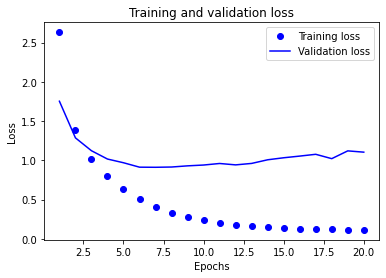

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

OVERFITS AFTER NINE EPOCHS!

### Training and Validation Accuracy

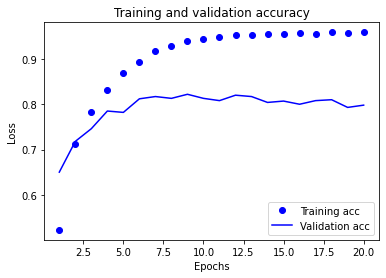

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Let’s train a new network from scratch for nine epochs and then evaluate it on the test set

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print('\nRESULTS:', results)

Epoch 1/9
16/16 [==============================] - 1s 25ms/step - loss: 3.1299 - accuracy: 0.4147 - val_loss: 1.7583 - val_accuracy: 0.6450
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.5482 - accuracy: 0.6978 - val_loss: 1.2984 - val_accuracy: 0.7310
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0954 - accuracy: 0.7698 - val_loss: 1.1077 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8204 - accuracy: 0.8279 - val_loss: 1.0207 - val_accuracy: 0.7740
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6630 - accuracy: 0.8617 - val_loss: 0.9499 - val_accuracy: 0.8020
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5197 - accuracy: 0.8891 - val_loss: 0.9090 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4087 - accuracy: 0.9177 - val_loss: 0.8879 - val_accuracy: 0.8260
Epoch 8/9
16/16 [===

Reaches an accuracy of ~80%

### Comparing with baseline (RANDOM GUESS):

In [16]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.17898486197684774

Generating predictions for new data

In [17]:
predictions = model.predict(x_test)
print('shape:', predictions.shape)

shape: (2246, 46)


In [18]:
np.sum(predictions[0])

1.0000001

The largest entry is the predicted class—the class with the highest probability:

In [19]:
np.argmax(predictions[0])

3

# A different way to handle the labels and the loss
----

Another way to encode the labels would be to cast them as an integer tensor

In [20]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The loss function categorical_crossentropy expects the labels to follow a categorical encoding;

With integer labels, you should use sparse_categorical_crossentropy 

In [21]:
# model.compile(optimizer='rmsprop',
#               loss='sparse_categorical_crossentropy',
#               metrics=['acc'])

# Wrapping Up
----

* If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N;

* In a single-label, multiclass classification problem, your network should end
with a softmax activation so that it will output a probability distribution over the N output classes;

* Categorical crossentropy is almost always the loss function you should use for
such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets;

* There are two ways to handle labels in multiclass classification:
  1. Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
  2. Encoding the labels as integers and using the sparse_categorical_crossentropy loss function

* If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.
